# Food for good

### Table of content

1. Cleaning the data
    - Removing columns that have very high values of NaN
    - Correcting some mistakes (inputs errors)
        
2. Data Visualization 

    A. Quality of food
    - Products with palm oil
    - Products with additives
    - Countries with palm oil
    
    B. Carbon Footprint
    
        

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression

We have our database in a csv format, the file has a size of 1.7Gb, which is big but still manageable. So we decide to use pandas to exploit it.

We couldn't explore the file in excel, and when we open it directly we get multiple errors.
So we imported the csv library of python just to get a first glimpse at the data.

In [2]:
#import csv
#with open(r'en.openfoodfacts.org.products.csv', 'rt') as f:
#    reader = csv.reader(f)
#    linenumber = 1
#    try:
#        print(next(reader))
#    except Exception as e:
#        print (("Error line %d: %s %s" % (linenumber, str(type(e)), e.message)))

By getting the first line of the file, we notice that it is delimiter is "\t". So we can now open it with pandas without any problem

In [4]:
df=pd.read_csv('en.openfoodfacts.org.products.csv',sep="\t")

/Users/yassineat/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (0,3,5,24,25,26,28,36,41,49) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1529059204,2018-06-15T10:40:04Z,Vitória crackers,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,NaN,130 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000178,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1542456332,2018-11-17T12:05:32Z,1542456333,2018-11-17T12:05:33Z,Mini coco,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1534239669,2018-08-14T09:41:09Z,1534239732,2018-08-14T09:42:12Z,Mendiants,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning the data

In [6]:
df.shape

(699653, 173)

The dataframe has a shape of (695207, 173) and many Nan values. We try dropping them but got an empty dataframe. So all the rows have Nan values in them.

In [7]:
df.dropna()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g


We look at the number of nan values in each column and plot their distribution:

In [8]:
nan_values=df.isnull().sum(axis=0).sort_values()
nan_values

last_modified_t                                 0
last_modified_datetime                          0
creator                                         4
created_t                                       4
created_datetime                               10
code                                           34
url                                            34
states_en                                      68
states_tags                                    68
states                                         68
countries_en                                  594
countries                                     594
countries_tags                                594
serving_quantity                            18082
product_name                                26094
energy_100g                                103225
proteins_100g                              104663
fat_100g                                   108596
carbohydrates_100g                         108852
sugars_100g                                119262


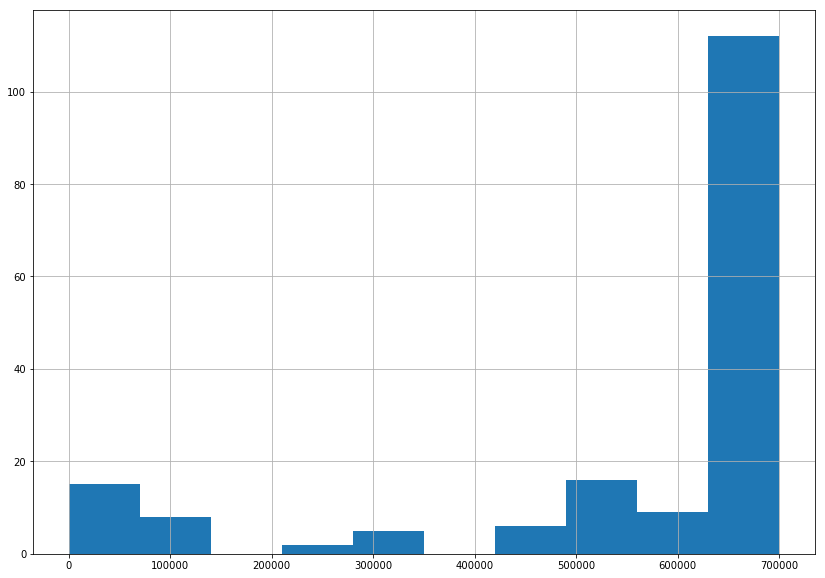

In [9]:
plt.figure(figsize=(14,10))
nan_values.hist()
plt.show()

So over than 100 columns have more than 600 000 Nan values on around 700 000 entries. We can understand from this that these columns may not be very pertinent.

In [10]:
list(nan_values[nan_values>600000].index.values)

['image_url',
 'image_small_url',
 'stores',
 'generic_name',
 'allergens',
 'manufacturing_places',
 'manufacturing_places_tags',
 'image_ingredients_url',
 'image_ingredients_small_url',
 'traces_en',
 'traces_tags',
 'image_nutrition_small_url',
 'image_nutrition_url',
 'traces',
 'emb_codes',
 'emb_codes_tags',
 'origins',
 'origins_tags',
 'cities_tags',
 'first_packaging_code_geo',
 'potassium_100g',
 'polyunsaturated-fat_100g',
 'monounsaturated-fat_100g',
 'ingredients_that_may_be_from_palm_oil_tags',
 'vitamin-pp_100g',
 'ingredients_from_palm_oil_tags',
 'vitamin-b1_100g',
 'vitamin-b2_100g',
 'alcohol_100g',
 'fruits-vegetables-nuts-estimate_100g',
 'vitamin-d_100g',
 'vitamin-b6_100g',
 'magnesium_100g',
 'phosphorus_100g',
 'vitamin-b12_100g',
 'vitamin-b9_100g',
 'zinc_100g',
 'cocoa_100g',
 'fruits-vegetables-nuts_100g',
 'folates_100g',
 'pantothenic-acid_100g',
 'copper_100g',
 'vitamin-e_100g',
 'manganese_100g',
 'selenium_100g',
 'omega-3-fat_100g',
 'vitamin-k_100g

In [11]:
useless_features=list(nan_values[nan_values>600000].index.values)
df.drop(useless_features,axis=1)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,quantity,packaging,...,fiber_100g,proteins_100g,salt_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
0,0000000000017,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1529059080,2018-06-15T10:38:00Z,1529059204,2018-06-15T10:40:04Z,Vitória crackers,NaN,NaN,...,NaN,7.8,1.400,0.551181,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000031,http://world-en.openfoodfacts.org/product/0000...,isagoofy,1539464774,2018-10-13T21:06:14Z,1539464817,2018-10-13T21:06:57Z,Cacao,130 g,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0000000000123,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1535737982,2018-08-31T17:53:02Z,1535737986,2018-08-31T17:53:06Z,Sauce Sweety chili 0%,NaN,NaN,...,NaN,0.2,2.040,0.803150,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000178,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1542456332,2018-11-17T12:05:32Z,1542456333,2018-11-17T12:05:33Z,Mini coco,NaN,NaN,...,NaN,2.0,1.150,0.452756,NaN,NaN,NaN,NaN,NaN,NaN
4,0000000000291,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1534239669,2018-08-14T09:41:09Z,1534239732,2018-08-14T09:42:12Z,Mendiants,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0000000000949,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1523440813,2018-04-11T10:00:13Z,1523440823,2018-04-11T10:00:23Z,Salade de carottes râpées,NaN,NaN,...,NaN,0.9,0.420,0.165354,NaN,NaN,NaN,NaN,NaN,NaN
6,0000000000970,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1520506368,2018-03-08T10:52:48Z,1520506371,2018-03-08T10:52:51Z,Fromage blanc aux myrtilles,NaN,NaN,...,NaN,4.4,0.250,0.098425,NaN,NaN,NaN,NaN,NaN,NaN
7,0000000001001,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1537766416,2018-09-24T05:20:16Z,1537766416,2018-09-24T05:20:16Z,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0000000001007,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1538127563,2018-09-28T09:39:23Z,1538127565,2018-09-28T09:39:25Z,Vainilla,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0000000001137,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1539781575,2018-10-17T13:06:15Z,1539781578,2018-10-17T13:06:18Z,Baguette parisien,NaN,NaN,...,NaN,11.7,0.678,0.266929,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df['nutrition_grade_fr']

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12          d
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18          a
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24        NaN
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
         ... 
699623    NaN
699624    NaN
699625      d
699626    NaN
699627    NaN
699628    NaN
699629    NaN
699630      a
699631    NaN
699632    NaN
699633    NaN
699634    NaN
699635    NaN
699636    NaN
699637      d
699638    NaN
699639    NaN
699640    NaN
699641    NaN
699642    NaN
699643      e
699644    NaN
699645    NaN
699646    NaN
699647    NaN
699648    NaN
699649    NaN
699650    NaN
699651    NaN
699652    NaN
Name: nutrition_grade_fr, Length: 699653, dtype: object

In [13]:
df['nutrition-score-fr_100g'].dropna()

12        14.0
18        -4.0
47        -4.0
49        15.0
248       29.0
254        0.0
255        1.0
257        6.0
277        9.0
288        1.0
292       12.0
298       16.0
300        2.0
302        1.0
303       14.0
308        2.0
319       15.0
329       18.0
340       17.0
353        0.0
359       15.0
369        3.0
389       26.0
409        1.0
411       11.0
412       10.0
414        3.0
415       13.0
426       36.0
427       13.0
          ... 
699340     2.0
699343    17.0
699344     6.0
699355    13.0
699356     3.0
699359    27.0
699361    12.0
699368     1.0
699380    18.0
699392    26.0
699407    12.0
699411    14.0
699424    22.0
699426     3.0
699443    20.0
699463    12.0
699464     9.0
699479    15.0
699486    -3.0
699490     4.0
699507    13.0
699527    16.0
699535     6.0
699537     0.0
699542    12.0
699544     7.0
699625    14.0
699630    -3.0
699637    15.0
699643    22.0
Name: nutrition-score-fr_100g, Length: 141843, dtype: float64

In [14]:
nan_values['nutrition_grade_fr']

557810

In [15]:
nutr_null=df[df['nutrition_grade_fr'].isnull()]
nutr_null=nutr_null.drop(nutr_null[nutr_null['countries'].str.contains("france",na=False)].index)
nutr_null=nutr_null.drop(nutr_null[nutr_null['countries'].str.contains("FR",na=False)].index)

In [16]:
nan_rows=df.isnull().sum(axis=1).sort_values()

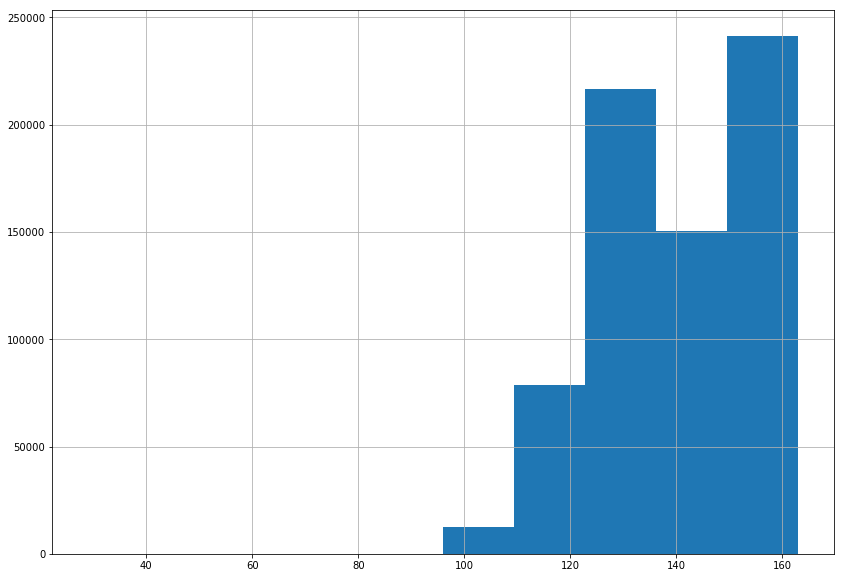

In [17]:
plt.figure(figsize=(14,10))
nan_rows.hist()
plt.show()

In [18]:
nan_rows[nan_rows<100]

208738    29
269868    79
608461    81
608396    81
269454    82
354877    83
609551    83
269343    83
354830    84
382333    84
269646    85
480292    85
269643    85
288046    85
439640    85
354977    85
269459    85
304538    86
269460    86
354870    86
304494    86
393777    86
39053     86
164991    87
269456    87
304506    87
517699    87
480286    87
415740    87
388864    87
          ..
346878    99
72209     99
305974    99
306188    99
564860    99
598879    99
542962    99
668833    99
346873    99
149282    99
598928    99
311260    99
287132    99
14501     99
14490     99
287908    99
312174    99
312260    99
14674     99
520729    99
35728     99
609765    99
609766    99
609767    99
609769    99
609771    99
316489    99
521065    99
39149     99
318107    99
Length: 277, dtype: int64

There are only 275 on 695 207 rows that have less than 100 nan values in their columns!

In [19]:
nan_values.groupby(by=nan_values).count()

0          2
4          2
10         1
34         2
68         3
594        3
18082      1
26094      1
103225     1
104663     1
108596     1
108852     1
119262     1
124388     1
124423     1
134529     1
234570     1
234603     1
305109     1
305143     3
305157     1
425434     1
435825     1
441782     1
458910     1
487532     1
487565     1
504586     1
518788     1
518789     1
          ..
699483     1
699518     1
699539     2
699547     1
699574     1
699588     1
699594     1
699607     1
699611     1
699613     1
699615     1
699616     1
699618     3
699619     1
699620     2
699621     1
699623     1
699626     1
699627     1
699632     1
699634     1
699639     2
699640     2
699642     1
699644     1
699646     1
699650     2
699651     7
699652    10
699653     4
Length: 131, dtype: int64

We can clean the dataset by removing the columns that have very high values of NaN.

In [20]:
#we remove the features that have very high number of nan values, but keep some of them that are relevant even if they have 
#also high numbers of nan values
features_to_remove=list(nan_values[nan_values>600000].index.values)
features_to_keep=['ingredients_from_palm_oil_tags','allergens','ingredients_that_may_be_from_palm_oil_tags','traces_tags','emb_codes_tags','origins_tags','cities_tags']
features_to_remove=[item for item in features_to_remove if item not in features_to_keep]
features_to_remove.extend(['code','url','creator','product_name','packaging','serving_size','nutrition-score-fr_100g',
                          'nutrition-score-uk_100g','created_t','created_datetime','last_modified_t',
                           'last_modified_datetime'])

#when some columns are tags, we remove the redundant column that's not called tags
for col in df.columns.values:
    if 'tags' in col:
        print(df[col].dropna().apply(lambda x: x.split(",")))
        features_to_remove.append(col.replace('_tags',''))
    if '_en' in col:
        features_to_remove.append(col)
features_to_remove=set(list(features_to_remove))

12                                  [barquette, plastique]
108                                     [bocal, plastique]
111                                            [plastique]
254                                    [carton, plastique]
255                                    [plastique, carton]
257                                                [frais]
267                                                [frais]
272                                  [paper, plastic-film]
277                                                [frais]
288                                     [frais, plastique]
290                                     [sachet-plastique]
292                                       [canette, metal]
296                                        [carton, boite]
300                                                 [frai]
301                                                [frais]
302                                    [sachet, plastique]
303                                               [carto

Name: origins_tags, Length: 42723, dtype: object
108                                                [france]
254                                                [france]
257                                       [brossard-quebec]
267                                       [brossard-quebec]
272                                        [united-kingdom]
277                                       [brossard-quebec]
288                                      [brossard, quebec]
292                                            [etats-unis]
296                                     [france, avranches]
300                                      [brossard, quebec]
301                                       [brossard-quebec]
303                                            [etats-unis]
309                                                [france]
353                                      [brossars, quebec]
355                                              [thailand]
362                                                

0                [en:france]
1                [en:france]
2                [en:france]
3                [en:france]
4                [en:france]
5                [en:france]
6                [en:france]
7                [en:france]
8                [en:france]
9                [en:france]
10               [en:france]
11               [en:france]
12               [en:france]
13               [en:france]
14               [en:france]
15               [en:france]
16               [en:france]
17               [en:france]
18               [en:france]
19               [en:france]
20               [en:france]
21               [en:france]
22               [en:france]
23               [en:france]
24               [en:france]
25               [en:france]
26               [en:france]
27               [en:france]
28               [en:france]
29               [en:france]
                 ...        
699623         [en:pakistan]
699624           [en:france]
699625           [en:france]
699626        

0         [en:to-be-completed, en:nutrition-facts-comple...
1         [en:to-be-completed, en:nutrition-facts-to-be-...
2         [en:to-be-completed, en:nutrition-facts-comple...
3         [en:to-be-completed, en:nutrition-facts-comple...
4         [en:to-be-completed, en:nutrition-facts-to-be-...
5         [en:to-be-completed, en:nutrition-facts-comple...
6         [en:to-be-completed, en:nutrition-facts-comple...
7         [en:to-be-completed, en:nutrition-facts-to-be-...
8         [en:to-be-completed, en:nutrition-facts-to-be-...
9         [en:to-be-completed, en:nutrition-facts-comple...
10        [en:to-be-completed, en:nutrition-facts-comple...
11        [en:to-be-completed, en:nutrition-facts-comple...
12        [en:to-be-completed, en:nutrition-facts-comple...
13        [en:to-be-completed, en:nutrition-facts-comple...
14        [en:to-be-completed, en:nutrition-facts-comple...
15        [en:to-be-completed, en:nutrition-facts-comple...
16        [en:to-be-completed, en:nutrit

In [21]:
cleaned_df=df.drop(features_to_remove,axis=1)
#pd.get_dummies(cleaned_df)

### Correcting some mistakes

### The energy

We know that the energy a product contains can mainly be calculated through his amount of carbs, fat and proteins. We also know that 1g of fat contains about 39 kJ of energy; 1g of carbohydrates and proteins both contain about 17 kJ of energy. By calculating the energy based on the features fat, carbohydrates and proteins and comparing it to the given value of energy we can detect if some entries might be wrong.

In [40]:
energy_data = cleaned_df.loc[:,['carbohydrates_100g','proteins_100g','fat_100g','energy_100g']].dropna()
energy_data['calculated_energy'] = 17*energy_data['carbohydrates_100g'] + 17*energy_data['proteins_100g'] + 39*energy_data['fat_100g']
energy_data['error(in %)'] = abs(energy_data['calculated_energy']/energy_data['energy_100g']-1) *100
energy_data.head()

,carbohydrates_100g,proteins_100g,fat_100g,energy_100g,calculated_energy,error(in %)
0,70.1,7.8,7.0,1569.0,1597.3,1.803697
2,4.8,0.2,0.0,88.0,85.0,3.409091
3,10.0,2.0,3.0,251.0,321.0,27.888446
5,5.3,0.9,0.3,134.0,117.1,12.611940
6,16.3,4.4,4.9,540.0,543.0,0.555556


In [41]:
energy_data['error(in %)'].replace([np.inf, -np.inf], np.nan).dropna().describe()

count    570139.000000
mean         46.026089
std        1339.604010
min           0.000000
25%           1.367612
50%           2.727273
75%           5.640535
max      509900.000000
Name: error(in %), dtype: float64

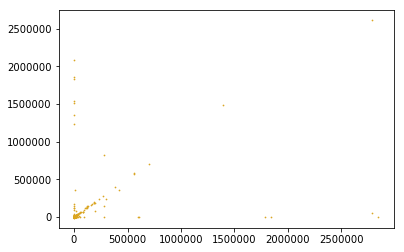

In [47]:
plt.scatter(energy_data["energy_100g"], energy_data["calculated_energy"],s = 0.5, c= "goldenrod")
plt.show()

We notice that there are a lot of calculated energy values that differ from given energy. These wrong values may come from wrong input values entered by some users. __How to tackle this ?__

#### Sum of features > 100g ?!

Our features (carbohydrates, proteins and fat) are given based on 100g. Then if the sum of theses features is higher than 100, we can conclude that the users inputs wrong values. So we can drop these rows.

In [56]:
energy_data["g_sum"] = energy_data['carbohydrates_100g'] + energy_data['proteins_100g'] + energy_data['fat_100g']
energy_data["exceeded"] = np.where(energy_data.g_sum.values > 100, 1, 0)
print(energy_data.count())
energy_data[energy_data.exceeded == 1].count()

carbohydrates_100g    588209
proteins_100g         588209
fat_100g              588209
energy_100g           588209
calculated_energy     588209
error(in %)           573229
_sum                  588209
g_sum                 588209
exceeded              588209
dtype: int64


carbohydrates_100g    2685
proteins_100g         2685
fat_100g              2685
energy_100g           2685
calculated_energy     2685
error(in %)           2685
_sum                  2685
g_sum                 2685
exceeded              2685
dtype: int64

There are 2685 wrong values (sum of the features > 100g), out of 588 209 values. We can drop them.

## Data Visualization

#### Column names

In [22]:
list(cleaned_df.columns.values)

['quantity',
 'packaging_tags',
 'brands_tags',
 'categories_tags',
 'origins_tags',
 'labels_tags',
 'emb_codes_tags',
 'cities_tags',
 'purchase_places',
 'countries_tags',
 'ingredients_text',
 'allergens',
 'traces_tags',
 'serving_quantity',
 'additives_n',
 'additives_tags',
 'ingredients_from_palm_oil_n',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_n',
 'ingredients_that_may_be_from_palm_oil_tags',
 'nutrition_grade_fr',
 'pnns_groups_1',
 'pnns_groups_2',
 'states_tags',
 'main_category',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'trans-fat_100g',
 'cholesterol_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g',
 'vitamin-a_100g',
 'vitamin-c_100g',
 'calcium_100g',
 'iron_100g']

#### Products with additives

In [ ]:
products_w_additives = cleaned_df.loc[:,['main_category','additives_n']].dropna()[cleaned_df.additives_n>0]
products_w_additives = products_w_additives.groupby('main_category').sum().sort_values(by=['additives_n'],ascending=False)

In [ ]:
products_w_additives[:15][::-1].plot.barh()
plt.show()

#### Products with Palm Oil

In [ ]:
palm_products = cleaned_df.loc[:,['main_category','ingredients_from_palm_oil_n']].dropna()[cleaned_df.ingredients_from_palm_oil_n>0]
palm_products.groupby('main_category').sum().sort_values(by=['ingredients_from_palm_oil_n'],ascending=False).head()

The products containing ingredients from palm oil / may be from palm oil are :
    - Sugary and salty snacks
    - Plan based food and beverages
    - Meals
    

In [ ]:
palm_products = cleaned_df.loc[:,['main_category','ingredients_that_may_be_from_palm_oil_n']].dropna()[cleaned_df.ingredients_that_may_be_from_palm_oil_n>0]
palm_products.groupby('main_category').sum().sort_values(by=['ingredients_that_may_be_from_palm_oil_n'],ascending=False).head()

#### Countries with Palm Oil

In [ ]:
countries = cleaned_df['countries_tags'].dropna().value_counts()
countries.head()

In [ ]:
countries[:10][::-1].plot.barh()
plt.show()

In [ ]:
palm_countries = cleaned_df.loc[:,['countries_tags','ingredients_that_may_be_from_palm_oil_n']].dropna()[cleaned_df.ingredients_that_may_be_from_palm_oil_n>0]
palm_countries.groupby('countries_tags').sum().sort_values(by=['ingredients_that_may_be_from_palm_oil_n'],ascending=False).head()

**France** and **USA** are the countries that are the most represented in the dataset

In [ ]:
palm_countries_bis = cleaned_df.loc[:,['countries_tags','ingredients_that_may_be_from_palm_oil_n']].dropna()[cleaned_df.ingredients_that_may_be_from_palm_oil_n>0]
palm_countries_bis.groupby('countries_tags').sum().sort_values(by=['ingredients_that_may_be_from_palm_oil_n'],ascending=False).head()

**France, Switzerland** and **Belgium** are the countries that have the most products with ingredients containing palm oil. ( France probably because it is the most represented country in the dataset ? )

------------------------------------------------------------
------------------------------------------------------------

In [ ]:
df[~df.index.isin(df.dropna(subset=['generic_name']).index)]

In [ ]:
#This function separates the data on one column, regarding whether it contains nan (test) or not (train)
def split_data_on_nan(dataframe,column):
    train = dataframe.dropna(subset=[column])
    test = dataframe.drop(train.index)
    return train,test

In [ ]:
tr,te=split_data_on_nan(df,'nutrition_grade_fr')

In [ ]:
trX=tr.drop('nutrition_grade_fr',axis=1)
trY=tr['nutrition_grade_fr']

In [ ]:
#cleaned_df['packaging_tags']=cleaned_df['packaging_tags'].dropna().apply(lambda x: x.split(","))
#pd.get_dummies(cleaned_df['packaging_tags'])

test=cleaned_df['packaging_tags'].dropna().str.get_dummies(sep=",")

In [ ]:
#this function splits the entries that contain tags
def f(x):
    return x.split(",")

all_tags=[]
for x in cleaned_df['countries_tags'].dropna().unique():
    all_tags.extend(f(x))
set(all_tags)

In [ ]:
df['nutrition_grade_fr'].dropna().hist()